In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%capture
# set up path to include parent directory
import sys
sys.path.append('../')

# Import everything from the data_utils library
from data_utils import *

# Load the talk data
talk_data = get_only_talks(load_data())

In [3]:
# Import libraries and setup matplotlib defaults
from matplotlib import pyplot as pl
import pandas as pd
import numpy as np
pl.style.use('bmh')
prop_cycle = pl.cycler(color=['#377eb8','#e41a1c','#4daf4a','#984ea3',
                              '#ff7f00','#ffff33','#a65628','#f781bf','#999999'])
pl.rcParams.update({
    'axes.prop_cycle': prop_cycle,
    'lines.linewidth': 2,
    'font.size': 20,
    'figure.figsize': [12, 8],
    'figure.subplot.left': 0.125,
    'figure.subplot.right': 0.95,
    'figure.subplot.bottom': 0.15})

In early 2022, I [published an analysis](https://qhspencer.github.io/lds-data-analysis/heavenlymother/) of the history of references to Heavenly Mother or Heavenly Parents in general conference. The main conclusion was that a significant surge in references had occurred beginning in 2013. Mere weeks after I published that, in April 2022 general conference, [Dale Renlund directly addressed the subject](https://www.churchofjesuschrist.org/study/general-conference/2022/04/36renlund?lang=eng). He referred those curious about the doctrine of Heavenly Mother to the LDS gospel topic essay on the subject, and then went on to explicitly caution against further speculation or praying to Heavenly Mother. This talk was widely received as a warning not to discuss the subject any further. Since 5 additional general conferences have passed since then, I thought it worth revisiting the previous analysis to see how that talk has affected the discourse since then.

I used the same methodology as in my original analysis, using the same set of search strings that were collected into two groups: one referencing specifically Heavenly Mother, and one making collective references to heavenly parents. The table below lists a count by conference and speaker of all references that have ocurred since 2022:

In [4]:
terms_agg = {
    'heavenly mother references':
    '(heavenly mother|mother in heaven|eternal feminine|a mother there)',
    'heavenly parents references':
    '(heavenly parents|heavenly father and mother)'}

df_list = []
for label, search_string in terms_agg.items():
    count_data = talk_data.assign(count=talk_data['body'].str.lower().str.count(search_string))
    agg_data = count_data[(count_data['year']>='2022-01-01') & (count_data['count']>0)].groupby(
        ['date', 'author']).sum()[['count']].rename(columns={'count': label})
    df_list.append(agg_data)

merged = df_list[0].join(df_list[1], how='outer').fillna(0).astype(int)
merged['total references'] = merged.sum(axis='columns')
merged.reset_index(inplace=True)
merged.sort_values(['date', 'author'], inplace=True)
merged['date'] = merged['date'].dt.strftime('%B %Y')
merged.set_index('date')

,author,heavenly mother references,heavenly parents references,total references
date,,,,
April 2022,Dale G. Renlund,3,4,7
October 2023,Emily Belle Freeman,0,1,1
October 2023,Ulisses Soares,0,1,1
April 2024,Brian K. Taylor,0,1,1


Remarkably, the Renlund talk from April 2022 includes 7 of the 10 total references that have occurred at the last 6 conferences. This is a striking drop in references from the prior decade. Based on this, and the previous analysis showing that there was a shift around 2013, we can now identify 3 distinct "eras" in references to Heavenly Mother: pre-2013, 2013-2022, and 2022 to the present. Because the Renlund talk was so specifically directed at the discourse on the subject, it is treated separately so that the before and after era results are not skewed by it. The statistics for the resulting 4 distinct periods are shown in the chart below:

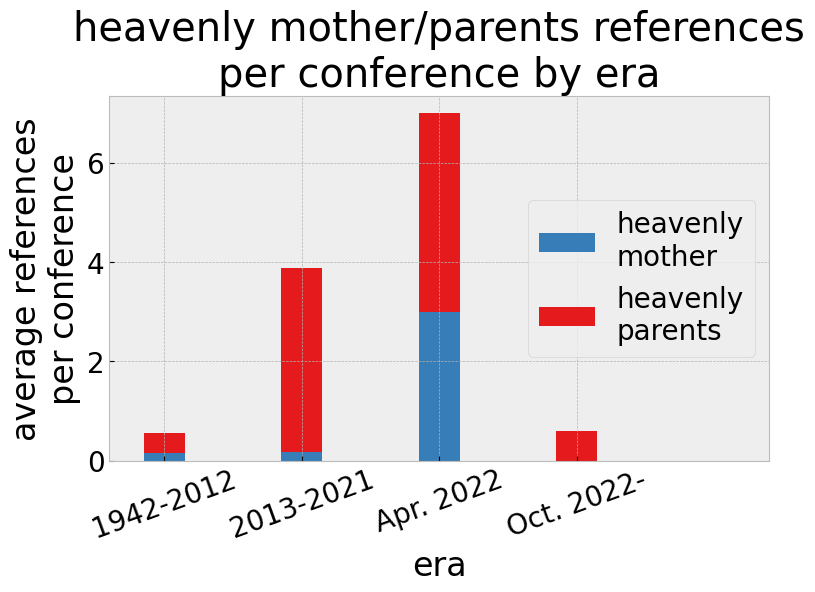

In [5]:
searchdata = {'search': [{'label': key, 'include': val} for key, val in terms_agg.items()]}
search_result = text_search(talk_data, searchdata, norm='date',
                            group='date', quiet=True)

search_result['era'] = np.select([(search_result.index<'2013-01-01'),
                                  (search_result.index<'2022-01-01'),
                                  (search_result.index<'2022-07-01')],
                                 ['1942-2012', '2013-2021', 'Apr. 2022'], default='Oct. 2022-')
era_stats = search_result.groupby('era').mean()
era_stats.columns = ['heavenly\nmother', 'heavenly\nparents']

ax = era_stats.plot.bar(
    figsize=[8,5],
    width=0.3,
    stacked=True, rot=20,
    title='heavenly mother/parents references\nper conference by era',
    ylabel='average references\nper conference')
ax.set_xlim([-0.4, 4.4])
_ = pl.legend(loc='center right')

The Renlund talk makes the April 2022 general conference stand out as a significant outlier in Heavenly Mother references, at nearly double the rate of the preceeding period from 2023-2021. After that talk, two things occurred:
* references dropped 85\% to a level similar to the low rate prior to 2013, and
* all references are only of the more generic form (heavenly parents).

What has happened? In my previous analysis I speculated that the increase in references starting in 2013 looked like it was unlikely to be a coincidence and likely indicated discussions behind the scenes played a role. In this case, the Renlund talk is an even more more explicit indicator that decisions were made behind the scenes. It was widely assumed at the time the talk was given that it was intended to shut the door on further conversation about the topic of Heavenly Mother. That assumption has now been unmistakably borne out in the data from the 5 following conferences. We can only speculate whether this initiative originated from Renlund himself or whether he was assigned to address the topic. However, his relatively low seniority rank among the apostles (10th of 12 at the time), and the clear measurable impact of the talk, both seem to weigh in on the side of an assignment.

In [6]:
# Setup show/hide source code box
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="show/hide source code"></form>''')